In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

import itertools

tf.random.set_seed(1)


In [2]:
train = pd.read_csv('/Users/morganallen/research_projects/math-problem-solver/Data/emnist-balanced-train.csv')
test = pd.read_csv('/Users/morganallen/research_projects/math-problem-solver/Data/emnist-balanced-test.csv')

In [3]:
X_train = np.array(train.iloc[:,1:].values)
y_train = np.array(train.iloc[:,0].values)
X_test = np.array(test.iloc[:,1:].values)
y_test = np.array(test.iloc[:,0].values)

In [4]:
X_train.shape

(112799, 784)

In [8]:
X_train = X_train.reshape([X_train.shape[0],28,28])

In [9]:
classification_dict = {'10':'A',
                      '11':'B',
                      '12':'C',
                      '13':'D',
                      '14':'E',
                      '15':'F',
                      '16':'G',
                      '17':'H',
                      '18':'I',
                      '19':'J',
                      '20':'K',
                      '21':'L',
                      '22':'M',
                      '23':'N',
                      '24':'O',
                      '25':'P',
                      '26':'Q',
                      '27':'R',
                      '28':'S',
                      '29':'T',
                      '30':'U',
                      '31':'V',
                      '32':'W',
                      '33':'X',
                      '34':'Y',
                      '35':'Z',
                      '36':'a',
                      '37':'b',
                      '38':'d',
                      '39':'e',
                      '40':'f',
                      '41':'g',
                      '42':'h',
                      '43':'n',
                      '44':'q',
                      '45':'r',
                      '46':'t'}

In [10]:
#y_train = y_train.astype('str')

In [11]:
#for t in range(0,y_train.shape[0]):
#  for l in range(0,len(list(classification_dict.keys()))):
#    if y_train[t] == list(classification_dict.keys())[l]:
#        y_train[t] = list(classification_dict.values())[l]

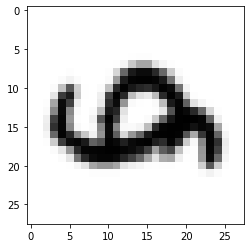

In [12]:
plt.imshow(X_train[0], cmap='Greys')

In [13]:
y_train[0]

36

In [12]:
X_train = X_train.reshape(-1,28,28,3)
X_test = X_test.reshape(-1,28,28,1)
#Normalizing the pixels
X_train = X_train / 255
X_test = X_test / 255

ValueError: cannot reshape array of size 88434416 into shape (224,224,3)

In [15]:
X_train.shape, X_test.shape

((112799, 28, 28, 1), (18799, 28, 28, 1))

In [16]:
def build_model(conv_layers, pool_layers, epochs, X_train, y_train):
  cnn_model = build_cnn(conv_layers, pool_layers)
  
    

  # Define a loss function
  loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

  # Compile the model
  cnn_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

  history = cnn_model.fit(X_train, y_train, epochs=epochs, validation_split=0.3)

  plot_history(history, epochs)

  #confusionmatrix(model= cnn_model)

  return history

In [21]:
def build_cnn(conv_layers, pool_layers):
    model_cnn = Sequential()
    model_cnn.add(Conv2D(30, kernel_size=3,activation='relu',input_shape=(28,28,1),padding='same'))
    model_cnn.add(MaxPooling2D((2, 2), padding='same'))
    model_cnn.add(Dropout(0.4))
    x=15
    for i in range(1, conv_layers):
        if i <= conv_layers-1:        
          model_cnn.add(Conv2D(x, kernel_size=3,activation='relu',padding='same'))
          model_cnn.add(MaxPooling2D((2, 2), padding='same'))
          model_cnn.add(Dropout(0.4))
          x=x*2
    model_cnn.add(Flatten())
    model_cnn.add(Dense(128, activation='relu'))
    model_cnn.add(Dense(50, activation='relu'))
    model_cnn.add(Dense(47, activation='softmax'))

    print(model_cnn.summary())
    return model_cnn

In [18]:
def plot_history(history, epochs):
  epochs = range(epochs)

  train_acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  plt.figure(figsize=(12, 8))
  plt.plot(epochs, train_acc, color='blue', label='Training accuracy')
  plt.plot(epochs, val_acc, color='red', label='Validation accuracy')
  plt.legend()
  plt.grid()

In [19]:
def confusionmatrix(model):

  confusion = confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=-1))

  confusion_norm = confusion.astype('float') / confusion.sum(axis=0)[:, np.newaxis]

  classes=[0,1,2,3,4,5,6,7,8,9]

  plt.figure(figsize=(14,14))
  plt.imshow(confusion_norm, interpolation='nearest') 
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks = np.arange(len(classes)) 
  plt.xticks(tick_marks, classes, rotation=45) 
  plt.yticks(tick_marks, classes)
  plt.xlabel('True Label')
  plt.ylabel('Predicted Label')
  fmt = '.3f'
  thresh = confusion_norm.max() / 2.
  for i, j in itertools.product(range(confusion_norm.shape[0]), range(confusion_norm.shape[1])):
    plt.text(j, i, format(confusion_norm[i, j], fmt), horizontalalignment="center",
    color="black" if confusion_norm[i, j] > thresh else "white")
  plt.tight_layout()

In [85]:
def data_aug():
    data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),])
    return data_augmentation

In [90]:
build_model(conv_layers=2, pool_layers=2, epochs=30, X_train=X_train, y_train=y_train)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_16 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
batch_normalization_17 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 64)        

KeyboardInterrupt: 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

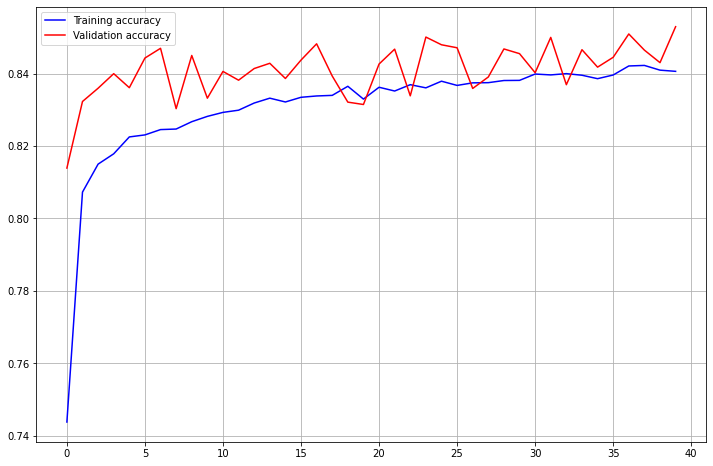

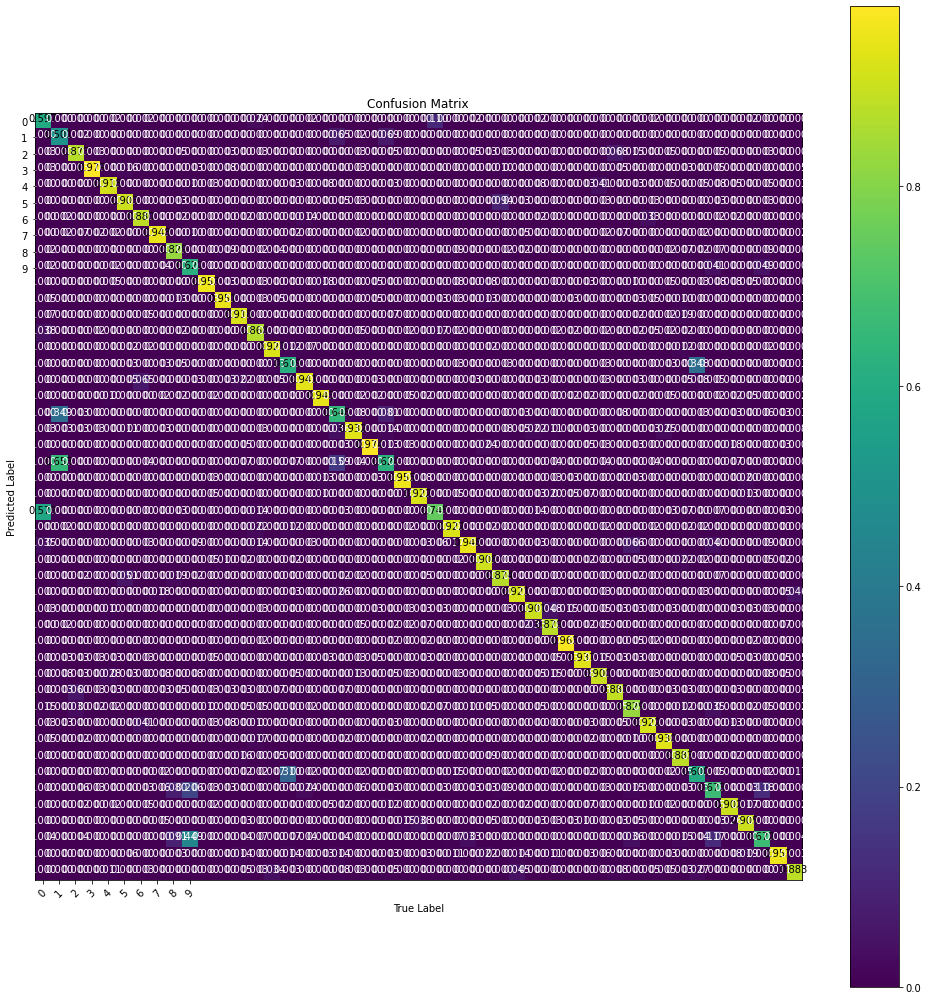

In [18]:
build_model(conv_layers=2, pool_layers=2, epochs=40, X_train=X_train, y_train=y_train)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 30)        300       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 15)        4065      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 15)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 735)              

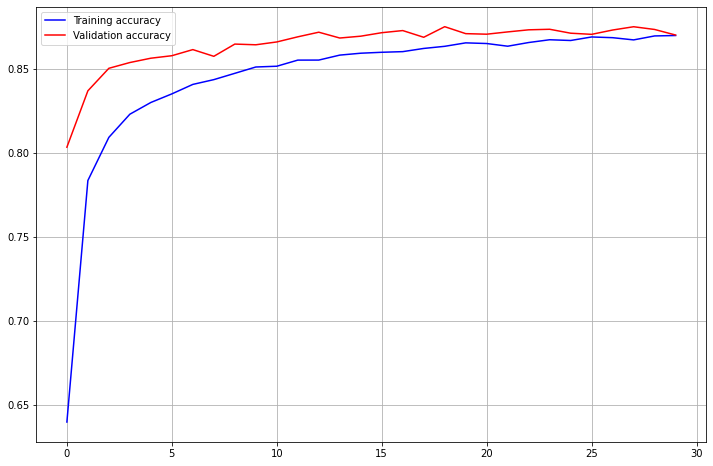

In [22]:
build_model(conv_layers=2, pool_layers=2, epochs=30, X_train=X_train, y_train=y_train)